## Objective
<h3> We want to create an clustering model which can be used for customer segmentation in order to decide marketing stratergies for a credit card company.<h3/> 

In [1]:
# importing libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Dataset
Dataset represents the usage behavior of about 9000 active credit card holders during the last 6 months. 
The file is at a customer level with 18 different behavioral variables.

In [2]:
import os
data = pd.read_csv("../Clustering/credit_card.csv")

In [3]:
data.shape

(8950, 18)

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

<b>As we can see the feature 'CUST_ID' is an object so it is not useful in our model development.
Also the features 'CREDIT_LIMIT' & 'MINIMUM_PAYMENTS' have some missing values.<b/>

In [6]:
# Dropping the 'CUST_ID' feature
data.drop('CUST_ID', inplace=True, axis=1)

In [7]:
# Checking number of null values in dataset
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
# removing the whole row having only 1 null value in feature 'CREDIT_LIMIT' 
data.dropna(subset = ['CREDIT_LIMIT'], inplace = True)

In [9]:
## replacing Nan values in MINIMUM_PAYMENTS by ist mean
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(), inplace=True)

In [10]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,864.304943,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2330.700932,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,335.657631,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,864.304943,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Exploratory Data Analysis

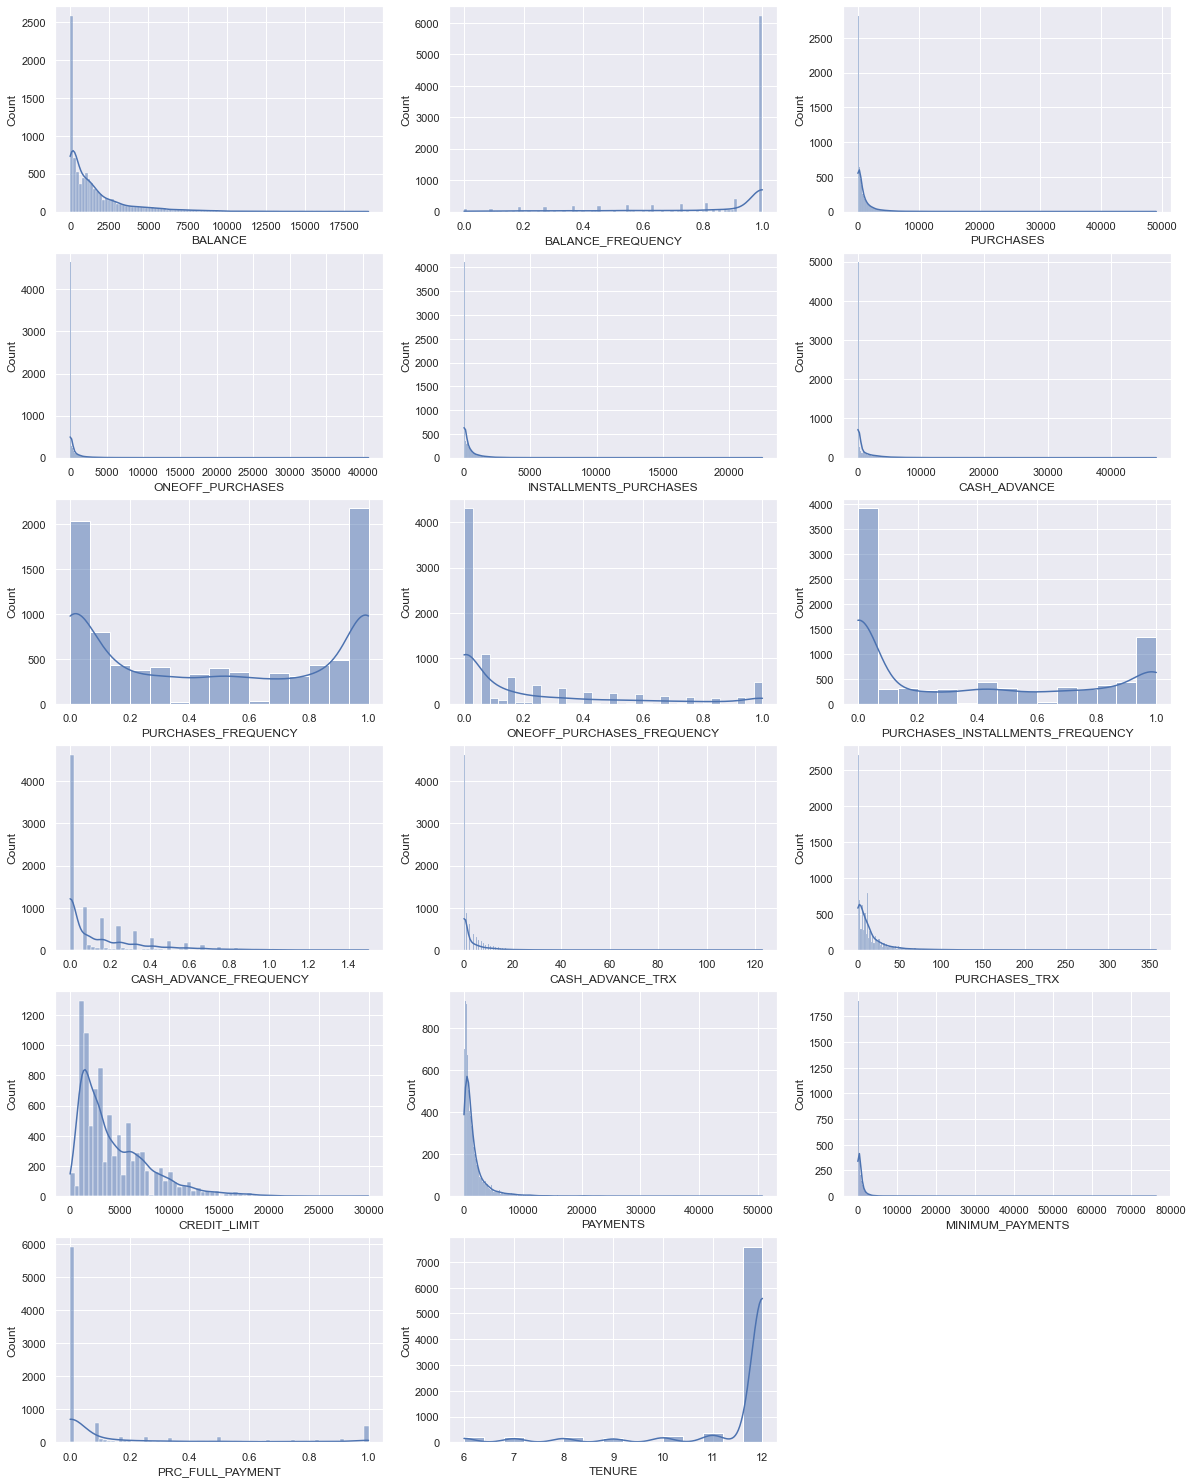

In [12]:
sns.set(rc={"figure.figsize":(20, 40)})
i = 1
for feature in data.columns:
    
    plt.subplot(9, 3, i)
    
    sns.histplot(data[feature], kde=True)
    i += 1
plt.show()

In [13]:
for feature in data.columns:
    print(f'{feature} : {data[feature].skew()}\n')

BALANCE : 2.393270481328754

BALANCE_FREQUENCY : -2.0241932378008083

PURCHASES : 8.143969328745825

ONEOFF_PURCHASES : 10.044621791824193

INSTALLMENTS_PURCHASES : 7.298823158100543

CASH_ADVANCE : 5.1663234455291605

PURCHASES_FREQUENCY : 0.0599701177816327

ONEOFF_PURCHASES_FREQUENCY : 1.5354529638777794

PURCHASES_INSTALLMENTS_FREQUENCY : 0.5090232211948914

CASH_ADVANCE_FREQUENCY : 1.8286441199006067

CASH_ADVANCE_TRX : 5.72097632533681

PURCHASES_TRX : 4.6304932272467205

CREDIT_LIMIT : 1.5224640052886198

PAYMENTS : 5.90746501386916

MINIMUM_PAYMENTS : 13.866770571057897

PRC_FULL_PAYMENT : 1.9426413977925

TENURE : -2.9447877484535407



### As We can see the dataset is hightly skewed,  So let's reduce skewness of dataset using technique called : 'Power Transferming'

In [14]:
# Applying a power transform featurewise to make data more Gaussian-like.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)
KM_data = pt.fit_transform(data)
KM_data = pd.DataFrame(KM_data, columns = data.columns)

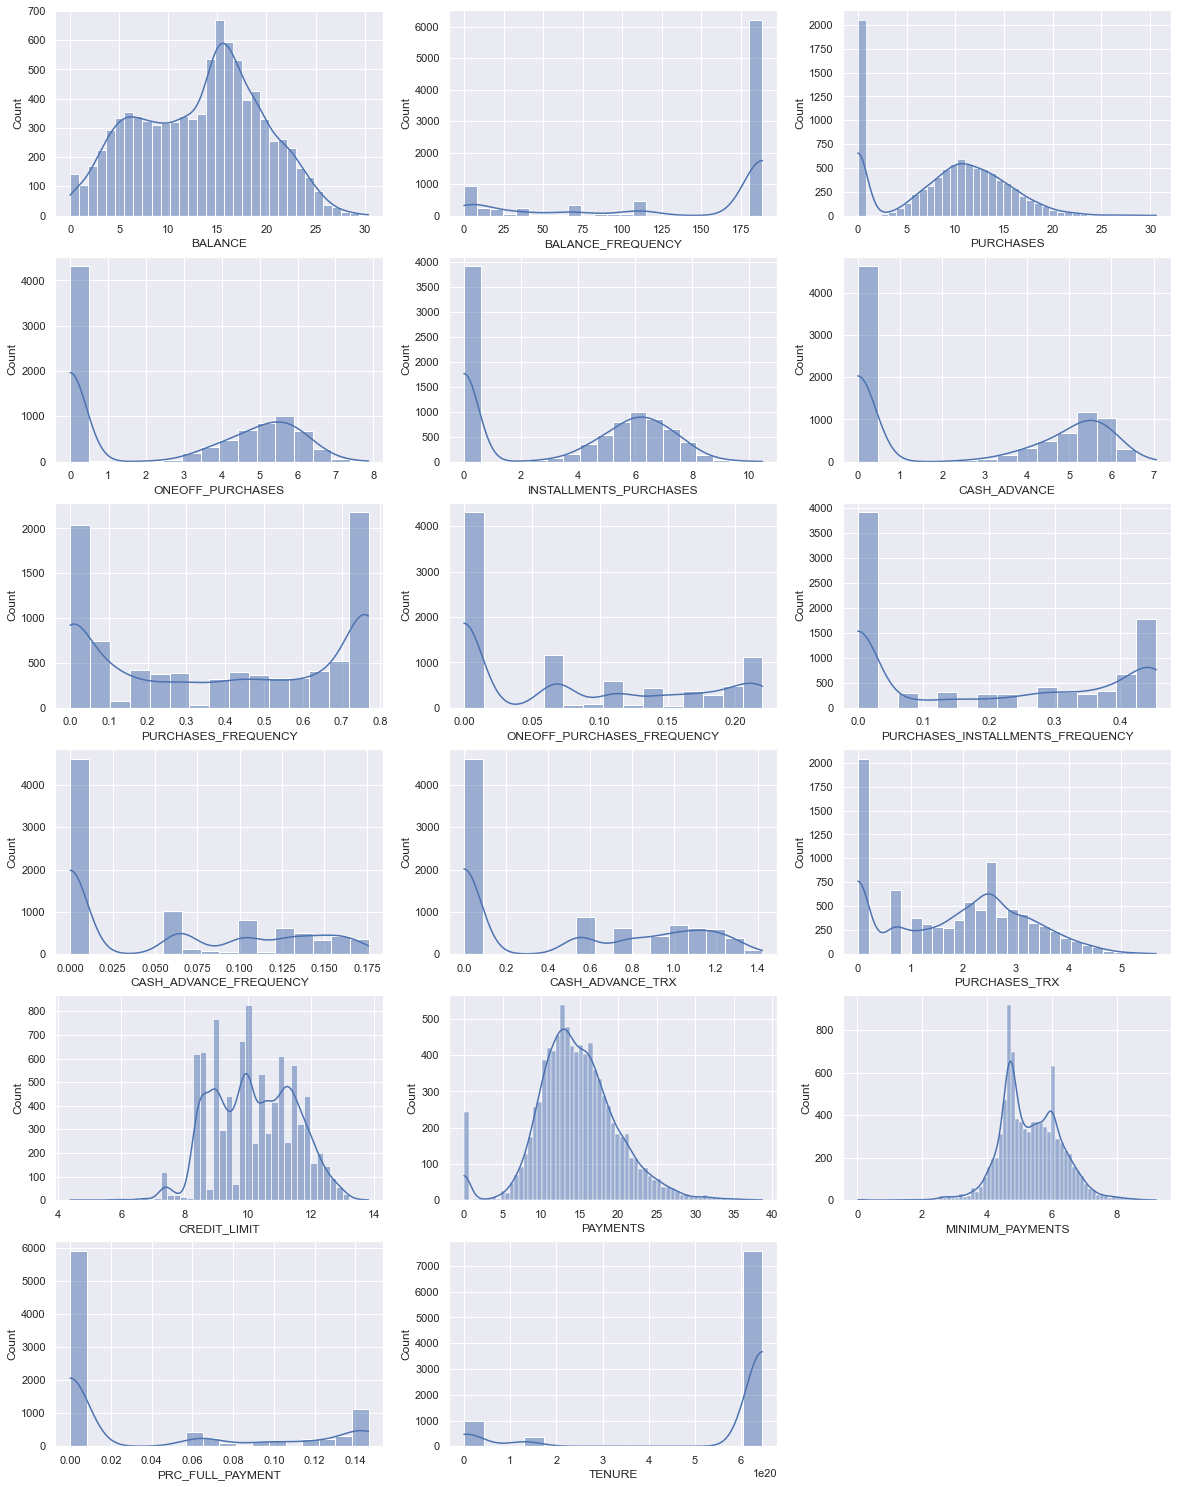

In [15]:
sns.set(rc={"figure.figsize":(20, 40)})
i = 1
for feature in KM_data.columns:
    
    plt.subplot(9, 3, i)
    sns.histplot(KM_data[feature], kde=True)
    i += 1
plt.show()

## correlation between each feature

<AxesSubplot:>

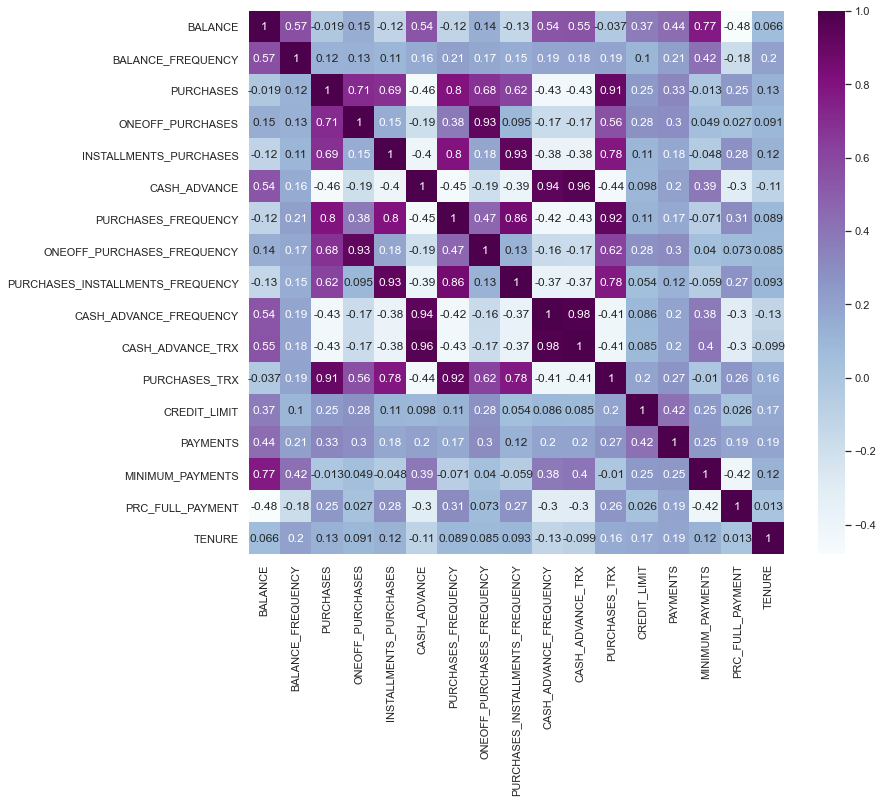

In [16]:
# After
plt.figure(figsize = (12, 10))
correlation = KM_data.corr()
sns.heatmap(correlation, annot = True, cmap = 'BuPu')

### Reducing the dimensionality to reduce the correlation between features in dataset.

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
scale = StandardScaler()
KM_data =  scale.fit_transform(KM_data)

In [19]:
pca = PCA()
pca.fit(KM_data)

PCA()

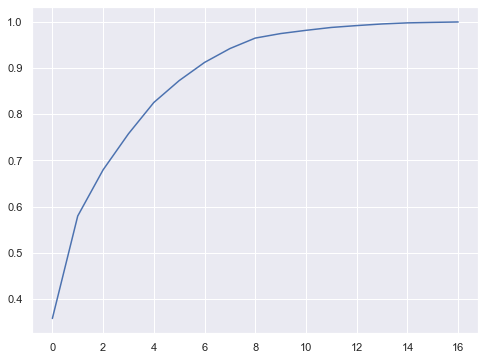

In [20]:
sns.set(rc={"figure.figsize":(8, 6)})
plt.plot(pca.explained_variance_ratio_.cumsum())

### We can preserve more than 90% variance if we reduce dataset to 6 dimensions.

In [21]:
pca = PCA(n_components=6)
x = pca.fit_transform(KM_data)

# 1. K-Means Clustering

In [22]:
from sklearn.cluster import KMeans

### Lets use elbow method to choose right number of clusters in our dataset

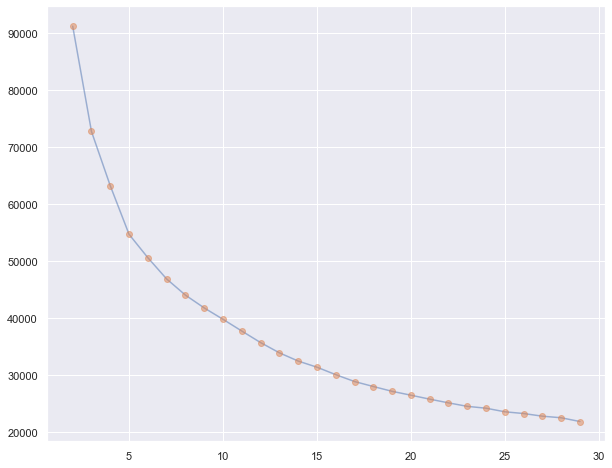

In [23]:
from sklearn.metrics import silhouette_score
plt.figure(figsize=(10,8))
inertia=[]
sil_scores=[]

for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, n_init=10, init = 'k-means++', algorithm='full', max_iter = 300)
    kmeans.fit(x)
    
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    
    sil_scores.append(silhouette_score(x, labels))
plt.plot(np.arange(2,30,1), inertia, alpha=0.5)
plt.plot(np.arange(2,30,1), inertia,'o' ,alpha=0.5)
plt.show() 

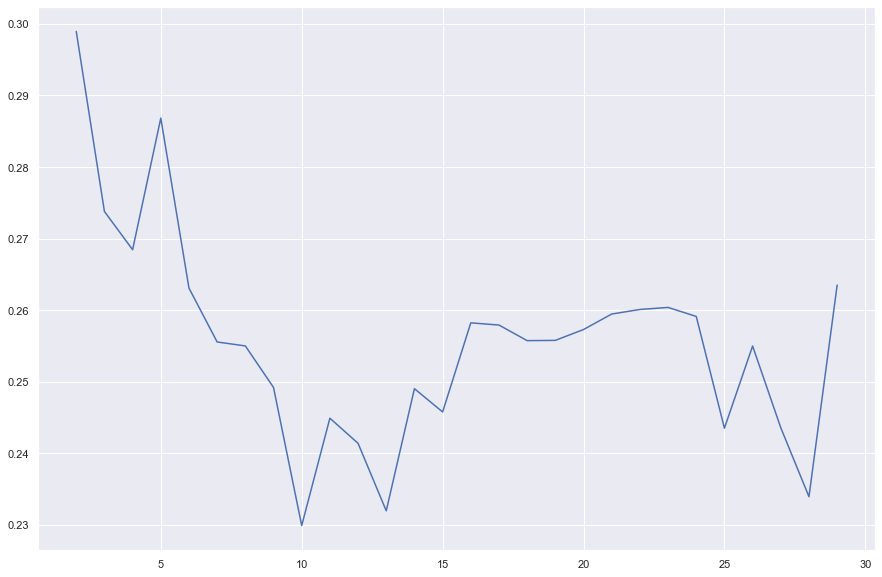

In [24]:
plt.figure(figsize=(15,10))
plt.plot(np.arange(2,30,1), sil_scores)
plt.show()

## 4 looks like the elbow of clusters for this problem

In [25]:
kmeans = KMeans(n_clusters=4, n_init=10, init = 'k-means++', algorithm='full', max_iter=300, tol=0.0001, random_state = 32)
kmeans.fit(x)
labels = kmeans.labels_

In [26]:
KM_data

array([[-1.23833786, -1.0801604 , -0.36831098, ..., -0.84985808,
        -0.67793662,  0.42210751],
       [ 1.05188287, -0.4256199 , -1.50536123, ...,  0.87773912,
         1.23484635,  0.42210751],
       [ 0.86050618,  0.62852726,  0.52149237, ...,  0.43507013,
        -0.67793662,  0.42210751],
       ...,
       [-1.40957025, -0.9921333 , -0.21655169, ..., -1.31392509,
         1.32828513, -2.52719186],
       [-1.55874115, -0.9921333 , -1.50536123, ..., -1.66240065,
         1.32828513, -2.52719186],
       [-0.32454944, -1.6469605 ,  0.70189133, ..., -1.25289315,
        -0.67793662, -2.52719186]])

### We will use PCA again so that we can reduce the data to 2 components, in order to visualize our clusters better

In [27]:
pca = PCA(n_components = 2)
x2 = pca.fit_transform(KM_data)

In [28]:
data_2d = pd.DataFrame(data = x2, columns = ['pc1', 'pc2'])
data_2d['cluster'] = labels

In [29]:
data_2d

,pc1,pc2,cluster
0,-0.258390,-3.131533,3
1,-3.473779,0.849350,1
2,1.340701,1.177133,0
3,-1.462791,-0.214111,1
4,-1.007437,-1.424514,3
...,...,...,...
8944,1.862819,-3.008249,3
8945,1.206495,-1.863653,3
8946,1.279597,-3.668093,3
8947,-2.811445,-3.901093,1


## Plotting the result with 5 clusters

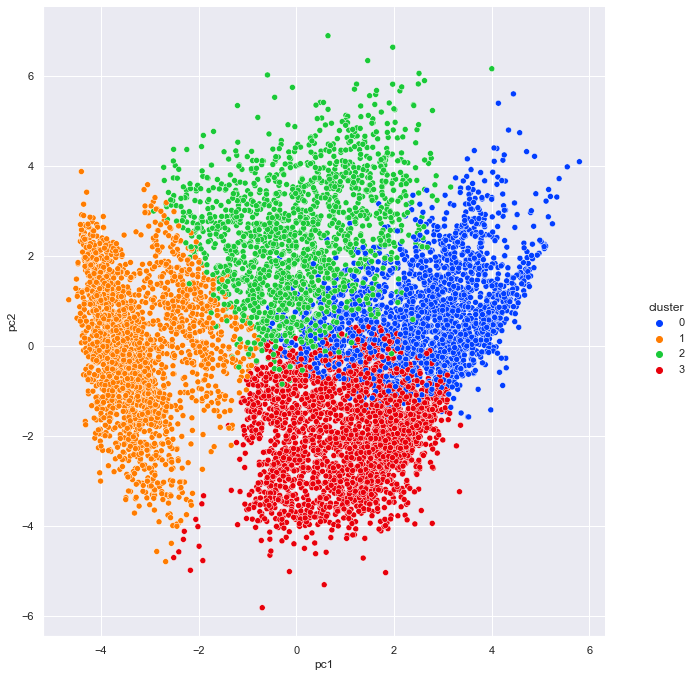

In [30]:
plot = sns.relplot(x='pc1', y='pc2',data=data_2d, hue='cluster', palette='bright' )
plot.fig.set_figwidth(10)
plot.fig.set_figheight(10)

## Let's Try 3 clusters

In [31]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, algorithm='full', max_iter = 381, random_state = 32)
kmeans.fit(x)

clusters = kmeans.labels_

pca = PCA(n_components = 2)
x2 = pca.fit_transform(KM_data)

data_k3 = pd.DataFrame(data = x2, columns = ['pc1', 'pc2'])
data_k3['cluster'] = clusters

In [32]:
data_k3

,pc1,pc2,cluster
0,-0.258390,-3.131534,1
1,-3.473779,0.849350,0
2,1.340701,1.177134,2
3,-1.462791,-0.214111,0
4,-1.007437,-1.424514,1
...,...,...,...
8944,1.862819,-3.008249,1
8945,1.206495,-1.863654,1
8946,1.279597,-3.668093,1
8947,-2.811445,-3.901093,0


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

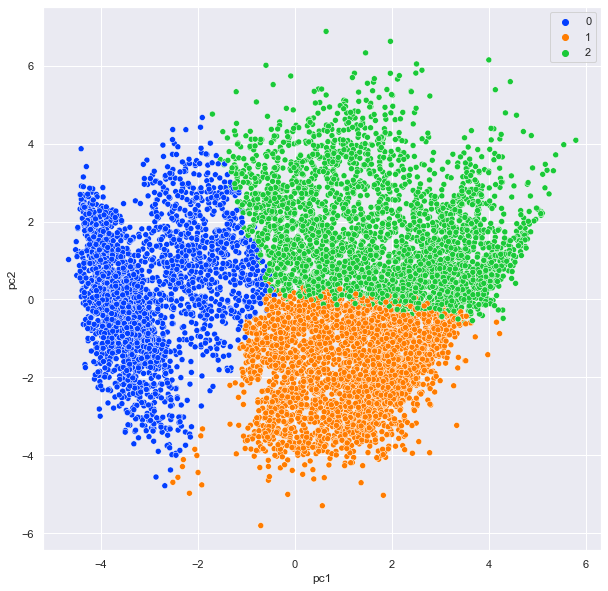

In [33]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'pc1', y = 'pc2', data = data_k3, hue = clusters, palette='bright')

### We can choose 4 or 3 clusters.  Each will serve totally different purpose. 




# 2. DBSCAN Clustering

- DBSCAN groups the points close to each other based on a distance measurement (usually Euclidean distance) and a minimum number of points.

In [34]:
# Reducing dataset into 2 dimensions
pca = PCA(n_components = 2)
x2 = pca.fit_transform(KM_data)

data_db = pd.DataFrame(data = x2, columns = ['pc1', 'pc2'])

In [102]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=0.17, min_samples=25, algorithm='ball_tree')
db.fit(data_db)
labels = db.labels_


In [103]:
# Adding resulting labels to dataset
data_db['cluster'] = labels

In [105]:
data_db

,pc1,pc2,cluster
0,-0.258390,-3.131533,-1
1,-3.473779,0.849350,0
2,1.340701,1.177134,-1
3,-1.462791,-0.214112,-1
4,-1.007437,-1.424514,-1
...,...,...,...
8944,1.862819,-3.008249,1
8945,1.206495,-1.863653,-1
8946,1.279597,-3.668093,-1
8947,-2.811445,-3.901093,-1


### Note : DBSCAN doesn't have a predict() method although it has a fit_predict() method, So we can use DBSCAN to train other algorithms like K-Neighbours 